<a href="https://colab.research.google.com/github/tanupunjani/Mastering-tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to NN with tensorflow

There are many defitions for a regression problem but in our case we are predicting a numerical variable based on some other combination of variables.

In [ ]:
#Import tensorflow
import tensorflow as tf


# Create data and use it 

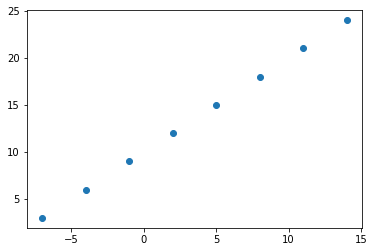

In [ ]:
#Create features 
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0 ,-1.0 ,2.0 ,5.0 ,8.0 ,11.0, 14.0])

#Create labels
y = np.array([3.0 ,6.0 ,9.0 ,12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it 
plt.scatter(X, y);

In [ ]:
y == X +10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tensor for our house prediction problem 
house_info = tf.constant(["bedroom","garage", "kitchen"])
house_price = tf.constant([939000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'garage', b'kitchen'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939000], dtype=int32)>)

In [ ]:
# we want to use X to predict y

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

In [ ]:
input_shape, output_shape

((), ())

## They are scalars and have no dimensions :)

In [ ]:
# Turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with tensorfow
1. **Create a model** - define the input and output layers as well as the hidden layers of the deep learning model.
3. **Compiling the model** - defining the loss function(basically telling how wrong our model is) and using optimizer which tells us how o improve the patterns, and use evaluation metrics (what can we use to interpret our model)
4. Fitting the model - letting the model try to find the patterns between X and y


In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error)
              optimizer=tf.keras.optimizers.SGD(), # sgd stands for stochastic gradient descent
              metrics=["mae"])


#3.Fit the model
model.fit(X, y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 1s 637ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#check x and y 
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make predict using our model 
model.predict([17.0])

array([[12.716021]], dtype=float32)

##improving our model

We can improve the model by altering the steps we used to create the model

1. **Creating the model** - here we might add more layers, increase the number of hidden units (called neurons) within each of the layers, change the activation function of each layer.
2. **Compiling the model** - here we might change the optimzation function or perhaps the **learning rate** of the optimization function. 
3. **Fitting the model** - here we might fit the model for more epochs(perhaps leave it training for longer) or more data(give the model more examples to learn from )

In [ ]:
# Lets rebuild our model

#Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 331ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [ ]:
#Lets see if the prediction is improved
model.predict([17.0]) # it should  be in the same format of our data

array([[29.739855]], dtype=float32)

In [ ]:
# Lets improve the model by adding extra hidden units

#Create the model

model = tf.keras.Sequential([
         tf.keras.layers.Dense(100, activation="relu"),
         tf.keras.layers.Dense(1)                    
])

#Compile the model

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model

model.fit(X, y, epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 372ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [ ]:
# Remind yourself of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

array([[31.223137]], dtype=float32)

#Common ways to improve a deep model :
1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization functions
5. Change the learning rate --> Very important
6. Fitting on more data


#Evaluating a model's performance

## The typical workflow you will go through while evaluating a model is :
````Build a model --> fit the model -->evaluate the model --> tweak the model --> fit the model --> evalaute the model -->tweak the model -->fit the model.... ````

#When it comes to evaluation there 3 things that you should keep in mind 

> Visualize, visualize, visualize

*What data are working with ? What does it look likee ?
* What does our model look like ?
* How does our model perform while training it
* The predictions of the model - how do the predictions of the model line up against the ground truth (the original table)

In [ ]:
#Make a larger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make lables for the dataset 
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

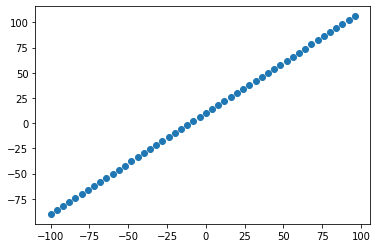

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets
1. training set - the model learns from it and its typically 70-80% of the data you have
2. Validation set - The model gets tuned on this data which is typically 10-15% of the data available
3. Test set - Model gets evaluated on this one to test what it has learned. This is 10-15% of the total data available.

In [ ]:
len(X)

50

In [ ]:
# Split the data into test and train sets
X_train = X[:40] # first 40 are training samples which is 80% of the data
y_train = y[:40]

X_test= X[40:] # last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

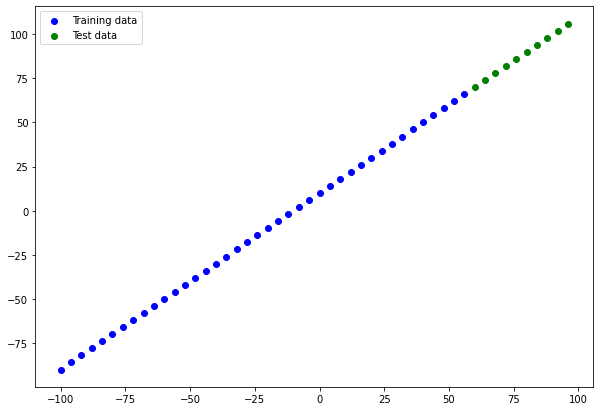

In [ ]:
plt.figure(figsize = (10,7))
#Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training data")
#Plot testing data in green
plt.scatter(X_test,y_test, c="g", label="Test data")
#show a legend
plt.legend();

In [ ]:
# Lets create the neural network for this model 

#Create the model 
model= tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model 
#model.fit(X_train,y_train, epochs=100)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
model.build()

ValueError: ignored

In [ ]:
#lets create the model which builds automatically by defining the input_shape argument 
tf.random.set_seed(42)

#Create the model
model= tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(1,name="output_layer")      
], name="model_1")

#Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
Demodel.summary()

NameError: ignored

##Total params - total number of parameters in the model
##Trainable parameters - these are the parameters that the model can update as it trains (patterns)
##Non-trainable paramters - They are not updated during trainig. This is typical when you have parameters from other models during transfer learning) 

In [ ]:
#Lets fit our model with training data

model.fit(X_train, y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 7ms/

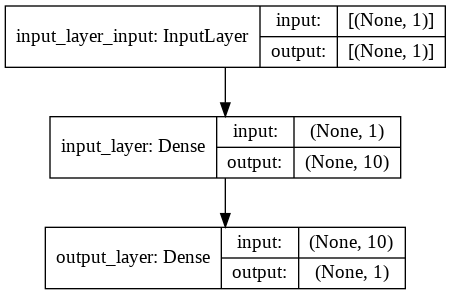

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#Visualizing our model's predictions
To visualize model, its a good idea to plot them against the ground truth 

Often the y_test or y_true are plotted against y_preds (grouth truth vs model's prediction)

In [ ]:
#making predictions
y_preds = model.predict(X_test)
y_preds

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Creating a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= y_preds):

#Plots training and test data and compares ground truth to predictions
  plt.figure(figsize= (10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels ,c="g", label="Test data")
  plt.scatter(test_data,predictions, c="r", label="Predictions")

  plt.legend();

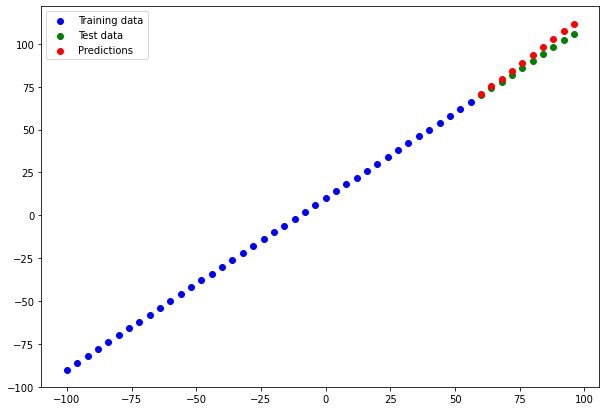

In [ ]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= y_preds)

#Evaluating our model's predictiion with regression evalaution metrics

* MAE - mean absolute error, on average how wrong is each of the model's predictions
* MSE - mean square error, sqaure the average errors

In [ ]:
#Evalaute the model 
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 130ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
#Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                      y_pred=tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

#MSE should be single output but here we see many outputs. This is because y_preds and y_test are of different shape

In [ ]:

tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

In [ ]:
y_preds.squeeze()

array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)

In [ ]:
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

In [ ]:

y_preds.squeeze().shape

(10,)

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
#Calcualte mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

#Running experiments to improve a model 

After looking at evaulation metrics and predictions of the models , there is a chance that u will improve it 

# You can do this by 3 ways
* Get more data
* Make more complex model - by making it larger by adding more layers and more hidden units
* Train for longer

#build model_1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

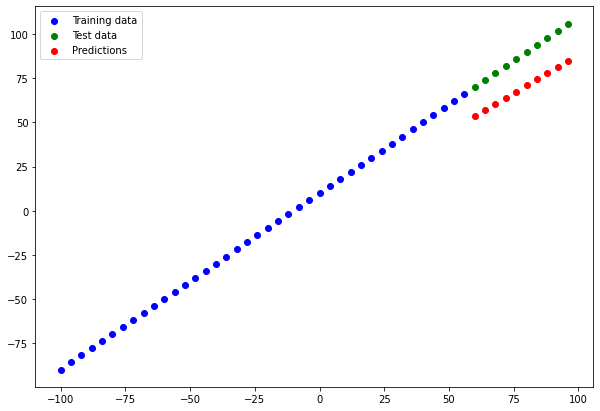

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

#Build model_2

#Just adding an extra dense layer and keeping everyting else the same

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 6ms/s

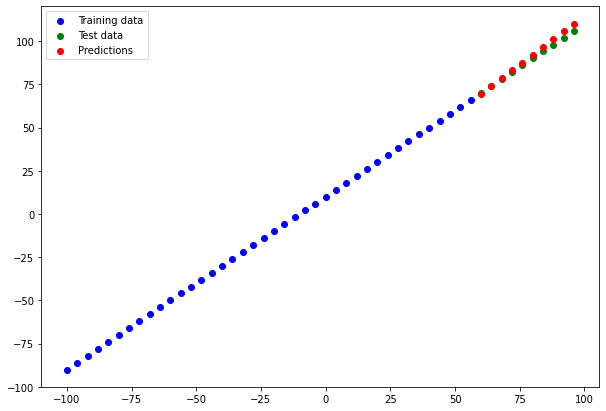

In [ ]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

#Model 3 - the only difference here is that we are increasing the epochs to 500 and keeping the model 2 same

#** This gives our model more chance to learn pattern from our data **

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

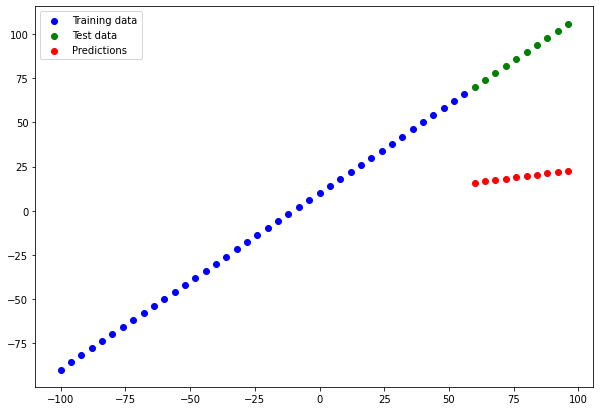

In [ ]:



# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

#Training for too long has given us worse results

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

#comparing results 

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                      ["model_2",mae_2,mse_2],
                     ["model_3", mae_3, mse_3]
]

In [ ]:
import pandas as pd

all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).



#Save the model

#Two major formats

* The savedModel format
* HDF5 format

In [ ]:
#Option 1
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
#Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format/

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
#Option 2
model_2.save("best_model_HDF5_format.h5")

In [ ]:
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [ ]:
#Load the model from saved one
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

# A larger example

In [ ]:
#Medical cost dataset

#Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#lets try one hot encoding our Datafram so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Creat X and y values (features and values)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]


In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 943us/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7514.6177 - mae: 7514.6177
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 963us/step - loss: 7735.9116 - mae: 7735.

In [ ]:
#Evaluate the model which means check the results of the model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

#Improving our model as it is not performing well

#Adding an extra layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)


Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
#Evaluate with increasing the epochs to 200

insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

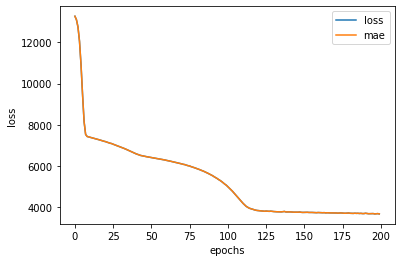

In [ ]:
#Plot history which also means loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#Preprocessing data (normalization and standardization)

#Neural networks tend to prefer normalization over standardization 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#To prepare our data we can borrow a few classes from scikit learn
``The major difference between normalization and one hot encoding is that normalization turns all the numerical values of the columns into 0 and 1 and one hot encoding does the same for only string values``

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

#Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi", "children"]), #turn all values in this column into 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker", "region"]) # ignores the columns which it does not know about
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
#Fit the column transformer on our training data
ct.fit(X_train)

#Transforming training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# How does the old data look now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
#normalized data
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# The normalized data shape is larger than old because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
#Lets use our model number 2

#set the random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])


#Fit the model
insurance_model_3.fit(X_train_normal, y_train, epochs=500)

 

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13340.4238 - mae: 13340.4238
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13304.7178 - mae: 13304.7178
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13178.4893 - mae: 13178.4893
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12868.2793 - mae: 12868.2793
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 12269.2344 - mae: 12269.2344
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 11321.8975 - mae: 11321.8975
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 10218.4619 - mae: 10218.4619
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 9182.0342 - mae: 9182.0342
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 8458.1797 - mae: 8458.1797
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 8055.3774 - 

In [ ]:
insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.7495 - mae: 3160.7495


In [ ]:

# Compare modelling results from non-normalized data and normalized data
insurance_model_3_mae

[3171.577392578125, 3171.577392578125]

In [ ]:
#Lets use our model number 2

#set the random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])


#Fit the model
insurance_model_3.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 12122.4551 - mae: 12122.4551
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 7648.9434 - mae: 7648.9434
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 5989.5879 - mae: 5989.5879
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 3933.2312 - mae: 3933.2312
Epoch 5/300
34/34 [==============================] - 0s 1ms/step - loss: 3631.3118 - mae: 3631.3118
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 3640.4832 - mae: 3640.4832
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 3561.0747 - mae: 3561.0747
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 3656.8723 - mae: 3656.8723
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3599.5771 - mae: 3599.5771
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3555.4492 - mae: 3555.44

In [ ]:
insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3172.6069 - mae: 3172.6069
